In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt

# Load the uploaded CSV file
file_path = 'data_before_smote.csv'
data = pd.read_csv(file_path)

# Separate features and target variable
X = data.drop('Is Fraudulent', axis=1)
y = data['Is Fraudulent']

# Split the data into training, testing, and validation sets (60% train, 20% test, 20% validation)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)



In [2]:
# Print the sizes of each dataset
print("Dataset Sizes:")
print(f"Original Training Set Size: {X_train.shape[0]}")
print(f"Training Set Size After SMOTE: {X_train_smote.shape[0]}")
print(f"Testing Set Size: {X_test.shape[0]}")
print(f"Validation Set Size: {X_val.shape[0]}")

# Print description of each dataset
print("\nDescription of Each Dataset:")
print("\nTraining Set (After SMOTE):")
print(pd.DataFrame(X_train_smote).describe())

print("\nTesting Set:")
print(pd.DataFrame(X_test).describe())

print("\nValidation Set:")
print(pd.DataFrame(X_val).describe())


Dataset Sizes:
Original Training Set Size: 883830
Training Set Size After SMOTE: 1692478
Testing Set Size: 294610
Validation Set Size: 294610

Description of Each Dataset:

Training Set (After SMOTE):
       Transaction Amount      Quantity  Customer Age  Customer Location  \
count        1.692478e+06  1.692478e+06  1.692478e+06       1.692478e+06   
mean         1.527330e-01 -1.678169e-03 -3.332128e-03       1.216481e+02   
std          1.031004e+00  9.221887e-01  9.169720e-01       1.821669e+02   
min         -1.064181e+00 -1.413806e+00 -4.550282e+00       1.000000e+00   
25%         -6.332763e-01 -7.069559e-01 -6.203370e-01       1.500000e+01   
50%         -1.394823e-01 -1.055681e-04 -7.891712e-03       4.500000e+01   
75%          6.603915e-01  7.067448e-01  6.066959e-01       1.480000e+02   
max          4.217522e+00  1.413595e+00  4.547516e+00       1.276000e+03   

       Account Age Days  Transaction Hour  Shipping City  Billing City  \
count      1.692478e+06      1.692478e+0

In [3]:
from collections import Counter

# Calculate the distribution before SMOTE
distribution_before_smote = Counter(y_train)

# Calculate the distribution after SMOTE
distribution_after_smote = Counter(y_train_smote)

# Print the distributions
print("Distribution before SMOTE:")
print(f"Not Fraudulent: {distribution_before_smote[0]}")
print(f"Fraudulent: {distribution_before_smote[1]}")

print("\nDistribution after SMOTE:")
print(f"Not Fraudulent: {distribution_after_smote[0]}")
print(f"Fraudulent: {distribution_after_smote[1]}")


Distribution before SMOTE:
Not Fraudulent: 846239
Fraudulent: 37591

Distribution after SMOTE:
Not Fraudulent: 846239
Fraudulent: 846239


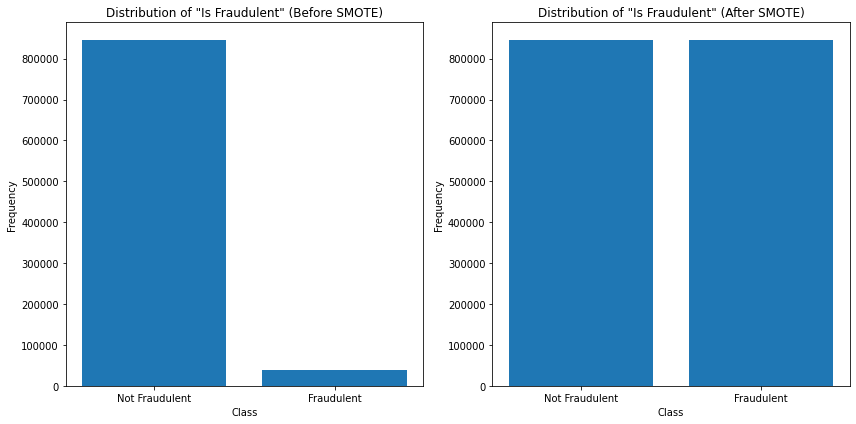

In [4]:
import matplotlib.pyplot as plt
from collections import Counter

# Calculate the distribution of classes before and after SMOTE
dist_before_smote = Counter(y_train)
dist_after_smote = Counter(y_train_smote)

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Distribution before SMOTE
ax[0].bar(['Not Fraudulent', 'Fraudulent'], dist_before_smote.values())
ax[0].set_title('Distribution of "Is Fraudulent" (Before SMOTE)')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Frequency')

# Distribution after SMOTE
ax[1].bar(['Not Fraudulent', 'Fraudulent'], dist_after_smote.values())
ax[1].set_title('Distribution of "Is Fraudulent" (After SMOTE)')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [5]:
X_train_smote

,Transaction Amount,Quantity,Customer Age,Customer Location,Account Age Days,Transaction Hour,Shipping City,Billing City,Payment Method_PayPal,Payment Method_bank transfer,...,Product Category_health & beauty,Product Category_home & garden,Product Category_toys & games,Device Used_desktop,Device Used_mobile,Device Used_tablet,Transaction Year,Transaction Month,Transaction Day,Transaction Weekday
0,1.082689,-0.706956,0.548484,424,-1.182838,20,37,37,1,0,...,0,0,0,0,1,0,2024,2,7,2
1,1.650006,1.413595,-1.650984,149,1.677128,16,136,136,1,0,...,0,0,1,1,0,0,2024,1,15,0
2,1.447919,0.706745,0.948387,18,-1.276607,17,133,141,0,0,...,1,0,0,0,0,1,2024,3,22,4
3,-0.769095,-0.706956,0.548484,12,-0.057605,16,75,73,0,0,...,0,1,0,0,0,1,2024,2,10,5
4,2.167796,-0.000106,2.548000,7,0.392488,10,34,35,0,0,...,0,1,0,0,1,0,2024,2,25,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692473,0.549130,0.706745,0.450327,175,1.169815,4,83,86,0,0,...,0,0,0,0,0,0,2024,2,6,2
1692474,0.520795,-0.368316,-0.634496,144,-0.767759,8,4,4,0,0,...,0,0,0,0,0,0,2024,1,6,3
1692475,-1.002536,1.413595,-1.770464,353,-1.559728,11,319,319,1,0,...,0,0,1,0,0,0,2024,2,14,4
1692476,-0.078639,-1.410821,0.548484,2,0.140221,7,17,15,0,1,...,0,0,0,1,0,0,2024,2,8,3


In [6]:
y_train_smote

0          0
1          0
2          0
3          0
4          0
          ..
1692473    1
1692474    1
1692475    1
1692476    1
1692477    1
Name: Is Fraudulent, Length: 1692478, dtype: int64

In [7]:
# Combine X and y for training, testing, and validation sets

# Combine training data (X_train_smote and y_train_smote)
train_set = pd.concat([X_train_smote, y_train_smote], axis=1)

# Combine testing data (X_test and y_test)
test_set = pd.concat([X_test, y_test], axis=1)

# Combine validation data (X_val and y_val)
validation_set = pd.concat([X_val, y_val], axis=1)


# Display the first few rows of each combined dataset
print("Training Set (After SMOTE):")
print(train_set.head(), "\n")

print("Test Set:")
print(test_set.head(), "\n")

print("Validation Set:")
print(validation_set.head(), "\n")

# Print sizes of combined datasets
print("Combined Dataset Sizes:")
print(f"Training Set Size (After SMOTE): {train_set.shape[0]} rows, {train_set.shape[1]} columns")
print(f"Test Set Size: {test_set.shape[0]} rows, {test_set.shape[1]} columns")
print(f"Validation Set Size: {validation_set.shape[0]} rows, {validation_set.shape[1]} columns")


Training Set (After SMOTE):
   Transaction Amount  Quantity  Customer Age  Customer Location  \
0            1.082689 -0.706956      0.548484                424   
1            1.650006  1.413595     -1.650984                149   
2            1.447919  0.706745      0.948387                 18   
3           -0.769095 -0.706956      0.548484                 12   
4            2.167796 -0.000106      2.548000                  7   

   Account Age Days  Transaction Hour  Shipping City  Billing City  \
0         -1.182838                20             37            37   
1          1.677128                16            136           136   
2         -1.276607                17            133           141   
3         -0.057605                16             75            73   
4          0.392488                10             34            35   

   Payment Method_PayPal  Payment Method_bank transfer  ...  \
0                      1                             0  ...   
1               

In [8]:
# Set pandas options to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Display the full train_set DataFrame
train_set


,Transaction Amount,Quantity,Customer Age,Customer Location,Account Age Days,Transaction Hour,Shipping City,Billing City,Payment Method_PayPal,Payment Method_bank transfer,Payment Method_credit card,Payment Method_debit card,Product Category_clothing,Product Category_electronics,Product Category_health & beauty,Product Category_home & garden,Product Category_toys & games,Device Used_desktop,Device Used_mobile,Device Used_tablet,Transaction Year,Transaction Month,Transaction Day,Transaction Weekday,Is Fraudulent
0,1.082689,-0.706956,0.548484,424,-1.182838,20,37,37,1,0,0,0,0,1,0,0,0,0,1,0,2024,2,7,2,0
1,1.650006,1.413595,-1.650984,149,1.677128,16,136,136,1,0,0,0,0,0,0,0,1,1,0,0,2024,1,15,0,0
2,1.447919,0.706745,0.948387,18,-1.276607,17,133,141,0,0,1,0,0,0,1,0,0,0,0,1,2024,3,22,4,0
3,-0.769095,-0.706956,0.548484,12,-0.057605,16,75,73,0,0,1,0,0,0,0,1,0,0,0,1,2024,2,10,5,0
4,2.167796,-0.000106,2.548000,7,0.392488,10,34,35,0,0,0,1,0,0,0,1,0,0,1,0,2024,2,25,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692473,0.549130,0.706745,0.450327,175,1.169815,4,83,86,0,0,0,0,0,0,0,0,0,0,0,0,2024,2,6,2,1
1692474,0.520795,-0.368316,-0.634496,144,-0.767759,8,4,4,0,0,1,0,0,0,0,0,0,0,0,0,2024,1,6,3,1
1692475,-1.002536,1.413595,-1.770464,353,-1.559728,11,319,319,1,0,0,0,0,0,0,0,1,0,0,0,2024,2,14,4,1
1692476,-0.078639,-1.410821,0.548484,2,0.140221,7,17,15,0,1,0,0,0,0,0,0,0,1,0,0,2024,2,8,3,1


## use train_set, test_set, validation_set 开始写model

## Logistic Regresssion

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Basic Evaluation Metrics for Test Set:
Accuracy: 0.9552
Precision: 0.1929
Recall: 0.0165
F1-Score: 0.0304

Basic Evaluation Metrics for Validation Set:
Accuracy: 0.9554
Precision: 0.2055
Recall: 0.0168
F1-Score: 0.0310

Detailed Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    282079
           1       0.19      0.02      0.03     12531

    accuracy                           0.96    294610
   macro avg       0.58      0.51      0.50    294610
weighted avg       0.93      0.96      0.94    294610


Detailed Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    282080
           1       0.21      0.02      0.03     12530

    accuracy                           0.96    294610
   macro avg       0.58      0.51      0.50    294610
weighted avg       0.93      0.96      0.94    294610



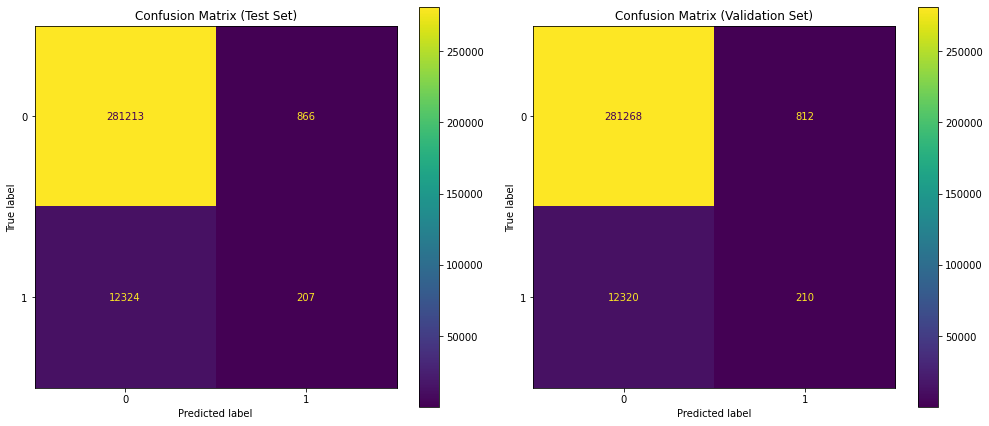

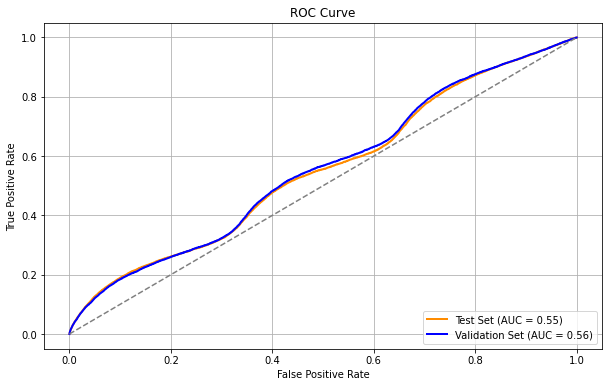

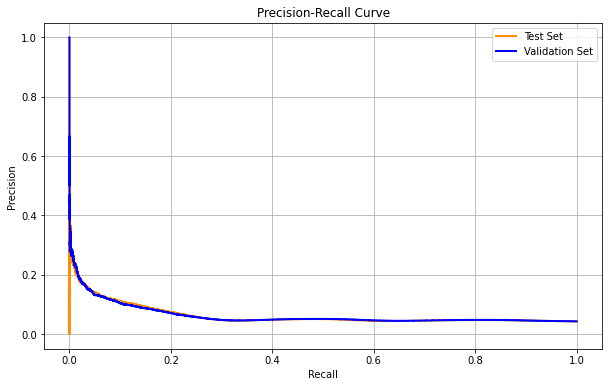

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assume train_set, test_set, validation_set are already defined
# Extracting features and target variable for train, test, and validation sets

# Split features and target for the train, test, and validation sets
X_train = train_set.drop('Is Fraudulent', axis=1)
y_train = train_set['Is Fraudulent']

X_test = test_set.drop('Is Fraudulent', axis=1)
y_test = test_set['Is Fraudulent']

X_val = validation_set.drop('Is Fraudulent', axis=1)
y_val = validation_set['Is Fraudulent']

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model on the training data
log_reg_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred = log_reg_model.predict(X_test)

# Predict on the validation set
y_val_pred = log_reg_model.predict(X_val)

# Calculate and display basic evaluation metrics for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("Basic Evaluation Metrics for Test Set:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1-Score: {f1_test:.4f}\n")

# Calculate and display basic evaluation metrics for validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)

print("Basic Evaluation Metrics for Validation Set:")
print(f"Accuracy: {accuracy_val:.4f}")
print(f"Precision: {precision_val:.4f}")
print(f"Recall: {recall_val:.4f}")
print(f"F1-Score: {f1_val:.4f}\n")

# Display detailed classification report for test and validation sets
print("Detailed Classification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

print("\nDetailed Classification Report for Validation Set:")
print(classification_report(y_val, y_val_pred))

# Plot confusion matrix for test and validation sets
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve

# Plot confusion matrix for test set
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, ax=ax[0])
ax[0].set_title('Confusion Matrix (Test Set)')

ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred, ax=ax[1])
ax[1].set_title('Confusion Matrix (Validation Set)')

plt.tight_layout()
plt.show()

# Calculate ROC curve and AUC for test set
fpr_test, tpr_test, _ = roc_curve(y_test, log_reg_model.predict_proba(X_test)[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)

# Calculate ROC curve and AUC for validation set
fpr_val, tpr_val, _ = roc_curve(y_val, log_reg_model.predict_proba(X_val)[:, 1])
roc_auc_val = auc(fpr_val, tpr_val)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'Test Set (AUC = {roc_auc_test:.2f})')
plt.plot(fpr_val, tpr_val, color='blue', lw=2, label=f'Validation Set (AUC = {roc_auc_val:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Calculate Precision-Recall curve for test set
precision_test, recall_test, _ = precision_recall_curve(y_test, log_reg_model.predict_proba(X_test)[:, 1])

# Calculate Precision-Recall curve for validation set
precision_val, recall_val, _ = precision_recall_curve(y_val, log_reg_model.predict_proba(X_val)[:, 1])

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall_test, precision_test, color='darkorange', lw=2, label='Test Set')
plt.plot(recall_val, precision_val, color='blue', lw=2, label='Validation Set')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


# KNN

Basic Evaluation Metrics for Test Set (KNN):
Accuracy: 0.9570
Precision: 0.0552
Recall: 0.0007
F1-Score: 0.0014

Basic Evaluation Metrics for Validation Set (KNN):
Accuracy: 0.9570
Precision: 0.0805
Recall: 0.0010
F1-Score: 0.0019

Detailed Classification Report for Test Set (KNN):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    282079
           1       0.06      0.00      0.00     12531

    accuracy                           0.96    294610
   macro avg       0.51      0.50      0.49    294610
weighted avg       0.92      0.96      0.94    294610


Detailed Classification Report for Validation Set (KNN):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    282080
           1       0.08      0.00      0.00     12530

    accuracy                           0.96    294610
   macro avg       0.52      0.50      0.49    294610
weighted avg       0.92      0.96      0.94    294610



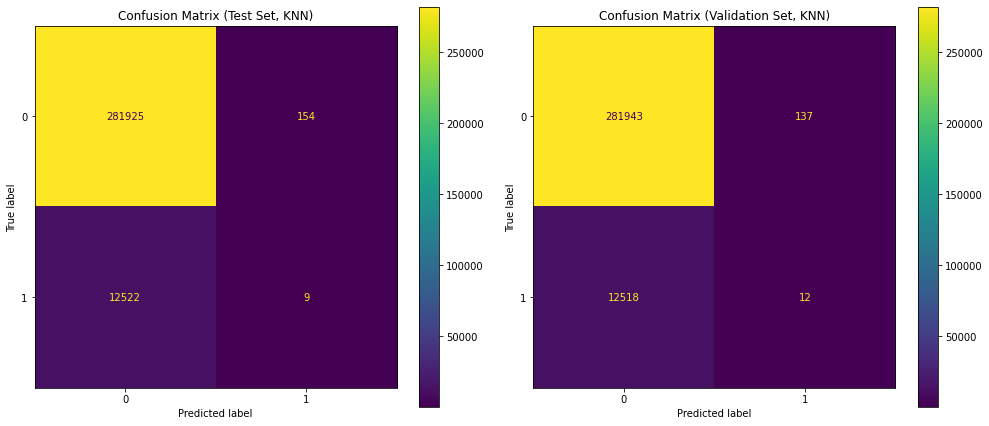

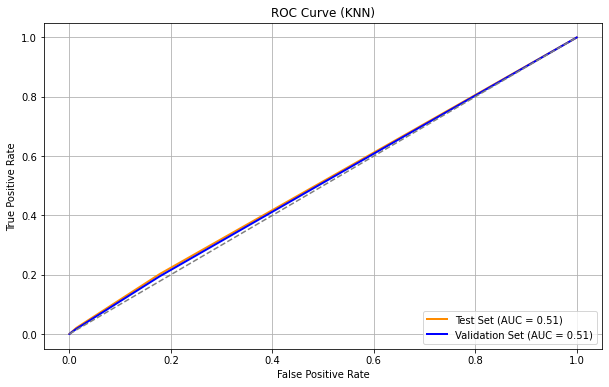

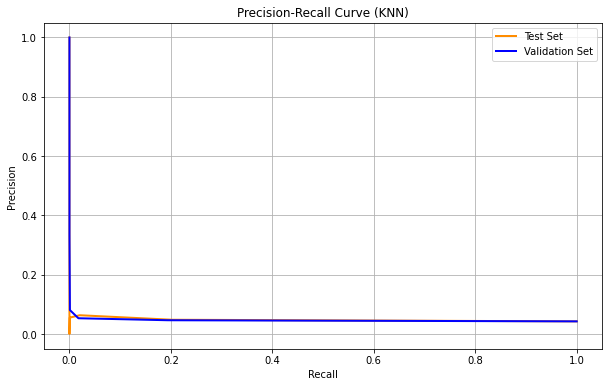

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Initialize the KNN model with k=5 (can be tuned later)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model on the training data
knn_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred_knn = knn_model.predict(X_test)

# Predict on the validation set
y_val_pred_knn = knn_model.predict(X_val)

# Calculate and display basic evaluation metrics for test set
accuracy_test_knn = accuracy_score(y_test, y_test_pred_knn)
precision_test_knn = precision_score(y_test, y_test_pred_knn)
recall_test_knn = recall_score(y_test, y_test_pred_knn)
f1_test_knn = f1_score(y_test, y_test_pred_knn)

print("Basic Evaluation Metrics for Test Set (KNN):")
print(f"Accuracy: {accuracy_test_knn:.4f}")
print(f"Precision: {precision_test_knn:.4f}")
print(f"Recall: {recall_test_knn:.4f}")
print(f"F1-Score: {f1_test_knn:.4f}\n")

# Calculate and display basic evaluation metrics for validation set
accuracy_val_knn = accuracy_score(y_val, y_val_pred_knn)
precision_val_knn = precision_score(y_val, y_val_pred_knn)
recall_val_knn = recall_score(y_val, y_val_pred_knn)
f1_val_knn = f1_score(y_val, y_val_pred_knn)

print("Basic Evaluation Metrics for Validation Set (KNN):")
print(f"Accuracy: {accuracy_val_knn:.4f}")
print(f"Precision: {precision_val_knn:.4f}")
print(f"Recall: {recall_val_knn:.4f}")
print(f"F1-Score: {f1_val_knn:.4f}\n")

# Display detailed classification report for test and validation sets
print("Detailed Classification Report for Test Set (KNN):")
print(classification_report(y_test, y_test_pred_knn))

print("\nDetailed Classification Report for Validation Set (KNN):")
print(classification_report(y_val, y_val_pred_knn))

# Plot confusion matrix for test and validation sets
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_knn, ax=ax[0])
ax[0].set_title('Confusion Matrix (Test Set, KNN)')

ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred_knn, ax=ax[1])
ax[1].set_title('Confusion Matrix (Validation Set, KNN)')

plt.tight_layout()
plt.show()

# Calculate ROC curve and AUC for test set
fpr_test_knn, tpr_test_knn, _ = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])
roc_auc_test_knn = auc(fpr_test_knn, tpr_test_knn)

# Calculate ROC curve and AUC for validation set
fpr_val_knn, tpr_val_knn, _ = roc_curve(y_val, knn_model.predict_proba(X_val)[:, 1])
roc_auc_val_knn = auc(fpr_val_knn, tpr_val_knn)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_test_knn, tpr_test_knn, color='darkorange', lw=2, label=f'Test Set (AUC = {roc_auc_test_knn:.2f})')
plt.plot(fpr_val_knn, tpr_val_knn, color='blue', lw=2, label=f'Validation Set (AUC = {roc_auc_val_knn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (KNN)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Calculate Precision-Recall curve for test set
precision_test_knn, recall_test_knn, _ = precision_recall_curve(y_test, knn_model.predict_proba(X_test)[:, 1])

# Calculate Precision-Recall curve for validation set
precision_val_knn, recall_val_knn, _ = precision_recall_curve(y_val, knn_model.predict_proba(X_val)[:, 1])

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall_test_knn, precision_test_knn, color='darkorange', lw=2, label='Test Set')
plt.plot(recall_val_knn, precision_val_knn, color='blue', lw=2, label='Validation Set')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (KNN)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


## Support Vector Machines (SVM)
## 不知道为什么run不出来

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Initialize the SVM model with probability estimates enabled
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

# Fit the SVM model on the training data
svm_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred_svm = svm_model.predict(X_test)

# Predict on the validation set
y_val_pred_svm = svm_model.predict(X_val)

# Calculate and display basic evaluation metrics for test set
accuracy_test_svm = accuracy_score(y_test, y_test_pred_svm)
precision_test_svm = precision_score(y_test, y_test_pred_svm)
recall_test_svm = recall_score(y_test, y_test_pred_svm)
f1_test_svm = f1_score(y_test, y_test_pred_svm)

print("Basic Evaluation Metrics for Test Set (SVM):")
print(f"Accuracy: {accuracy_test_svm:.4f}")
print(f"Precision: {precision_test_svm:.4f}")
print(f"Recall: {recall_test_svm:.4f}")
print(f"F1-Score: {f1_test_svm:.4f}\n")

# Calculate and display basic evaluation metrics for validation set
accuracy_val_svm = accuracy_score(y_val, y_val_pred_svm)
precision_val_svm = precision_score(y_val, y_val_pred_svm)
recall_val_svm = recall_score(y_val, y_val_pred_svm)
f1_val_svm = f1_score(y_val, y_val_pred_svm)

print("Basic Evaluation Metrics for Validation Set (SVM):")
print(f"Accuracy: {accuracy_val_svm:.4f}")
print(f"Precision: {precision_val_svm:.4f}")
print(f"Recall: {recall_val_svm:.4f}")
print(f"F1-Score: {f1_val_svm:.4f}\n")

# Display detailed classification report for test and validation sets
print("Detailed Classification Report for Test Set (SVM):")
print(classification_report(y_test, y_test_pred_svm))

print("\nDetailed Classification Report for Validation Set (SVM):")
print(classification_report(y_val, y_val_pred_svm))

# Plot confusion matrix for test and validation sets
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_svm, ax=ax[0])
ax[0].set_title('Confusion Matrix (Test Set, SVM)')

ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred_svm, ax=ax[1])
ax[1].set_title('Confusion Matrix (Validation Set, SVM)')

plt.tight_layout()
plt.show()

# Calculate ROC curve and AUC for test set
fpr_test_svm, tpr_test_svm, _ = roc_curve(y_test, svm_model.predict_proba(X_test)[:, 1])
roc_auc_test_svm = auc(fpr_test_svm, tpr_test_svm)

# Calculate ROC curve and AUC for validation set
fpr_val_svm, tpr_val_svm, _ = roc_curve(y_val, svm_model.predict_proba(X_val)[:, 1])
roc_auc_val_svm = auc(fpr_val_svm, tpr_val_svm)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_test_svm, tpr_test_svm, color='darkorange', lw=2, label=f'Test Set (AUC = {roc_auc_test_svm:.2f})')
plt.plot(fpr_val_svm, tpr_val_svm, color='blue', lw=2, label=f'Validation Set (AUC = {roc_auc_val_svm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SVM)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Calculate Precision-Recall curve for test set
precision_test_svm, recall_test_svm, _ = precision_recall_curve(y_test, svm_model.predict_proba(X_test)[:, 1])

# Calculate Precision-Recall curve for validation set
precision_val_svm, recall_val_svm, _ = precision_recall_curve(y_val, svm_model.predict_proba(X_val)[:, 1])

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall_test_svm, precision_test_svm, color='darkorange', lw=2, label='Test Set')
plt.plot(recall_val_svm, precision_val_svm, color='blue', lw=2, label='Validation Set')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (SVM)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


## Naive Bayes

In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Initialize the Gaussian Naive Bayes model
nb_model = GaussianNB()

# Fit the model on the training data
nb_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred_nb = nb_model.predict(X_test)

# Predict on the validation set
y_val_pred_nb = nb_model.predict(X_val)

# Calculate and display basic evaluation metrics for test set
accuracy_test_nb = accuracy_score(y_test, y_test_pred_nb)
precision_test_nb = precision_score(y_test, y_test_pred_nb)
recall_test_nb = recall_score(y_test, y_test_pred_nb)
f1_test_nb = f1_score(y_test, y_test_pred_nb)

print("Basic Evaluation Metrics for Test Set (Naive Bayes):")
print(f"Accuracy: {accuracy_test_nb:.4f}")
print(f"Precision: {precision_test_nb:.4f}")
print(f"Recall: {recall_test_nb:.4f}")
print(f"F1-Score: {f1_test_nb:.4f}\n")

# Calculate and display basic evaluation metrics for validation set
accuracy_val_nb = accuracy_score(y_val, y_val_pred_nb)
precision_val_nb = precision_score(y_val, y_val_pred_nb)
recall_val_nb = recall_score(y_val, y_val_pred_nb)
f1_val_nb = f1_score(y_val, y_val_pred_nb)

print("Basic Evaluation Metrics for Validation Set (Naive Bayes):")
print(f"Accuracy: {accuracy_val_nb:.4f}")
print(f"Precision: {precision_val_nb:.4f}")
print(f"Recall: {recall_val_nb:.4f}")
print(f"F1-Score: {f1_val_nb:.4f}\n")

# Display detailed classification report for test and validation sets
print("Detailed Classification Report for Test Set (Naive Bayes):")
print(classification_report(y_test, y_test_pred_nb))

print("\nDetailed Classification Report for Validation Set (Naive Bayes):")
print(classification_report(y_val, y_val_pred_nb))

# Plot confusion matrix for test and validation sets
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_nb, ax=ax[0])
ax[0].set_title('Confusion Matrix (Test Set, Naive Bayes)')

ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred_nb, ax=ax[1])
ax[1].set_title('Confusion Matrix (Validation Set, Naive Bayes)')

plt.tight_layout()
plt.show()

# Calculate ROC curve and AUC for test set
fpr_test_nb, tpr_test_nb, _ = roc_curve(y_test, nb_model.predict_proba(X_test)[:, 1])
roc_auc_test_nb = auc(fpr_test_nb, tpr_test_nb)

# Calculate ROC curve and AUC for validation set
fpr_val_nb, tpr_val_nb, _ = roc_curve(y_val, nb_model.predict_proba(X_val)[:, 1])
roc_auc_val_nb = auc(fpr_val_nb, tpr_val_nb)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_test_nb, tpr_test_nb, color='darkorange', lw=2, label=f'Test Set (AUC = {roc_auc_test_nb:.2f})')
plt.plot(fpr_val_nb, tpr_val_nb, color='blue', lw=2, label=f'Validation Set (AUC = {roc_auc_val_nb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Naive Bayes)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Calculate Precision-Recall curve for test set
precision_test_nb, recall_test_nb, _ = precision_recall_curve(y_test, nb_model.predict_proba(X_test)[:, 1])

# Calculate Precision-Recall curve for validation set
precision_val_nb, recall_val_nb, _ = precision_recall_curve(y_val, nb_model.predict_proba(X_val)[:, 1])

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall_test_nb, precision_test_nb, color='darkorange', lw=2, label='Test Set')
plt.plot(recall_val_nb, precision_val_nb, color='blue', lw=2, label='Validation Set')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Naive Bayes)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


NameError: name 'X_train' is not defined